In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

#1) Importing the data

In [ ]:
df = pd.read_csv('/content/FINAL-SMS-DATA.csv')

In [ ]:
df.head()

,_protocol,_address,_date,_type,_subject,_body,_toa,_sc_toa,_service_center,_read,_status,_locked,_date_sent,_sub_id,_readable_date,_contact_name
0,0,AD-rajpol,1.700000e+12,1,NaN,Complaint No 279970242301096 registered at C...,NaN,NaN,9.200000e+11,1,-1,0,1.700000e+12,1.0,17-10-2023 18:34,(Unknown)
1,0,AX-rajpol,1.700000e+12,1,NaN,EO has been assigned on your Complaint(not FIR...,NaN,NaN,9.200000e+11,1,-1,0,1.700000e+12,1.0,18-10-2023 11:54,(Unknown)
2,0,9.19E+11,1.700000e+12,2,NaN,"I am Sankar Rao from Mumbai, and I have an ide...",NaN,NaN,NaN,1,-1,0,0.000000e+00,1.0,29-11-2023 02:55,(Unknown)
3,0,AD-AIRDOT,1.720000e+12,1,NaN,"Alert: On receiving any unwanted SMS , please ...",NaN,NaN,9.200000e+11,1,-1,0,1.720000e+12,3.0,01-06-2024 21:51,(Unknown)
4,0,AX-VBFOOD,1.720000e+12,1,NaN,CreditChangeCrDayCrLmt Join group to learn abo...,NaN,NaN,9.200000e+11,0,-1,0,1.720000e+12,1.0,04-06-2024 11:57,(Unknown)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9811 entries, 0 to 9810
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _protocol        9811 non-null   int64  
 1   _address         9811 non-null   object 
 2   _date            9811 non-null   float64
 3   _type            9811 non-null   int64  
 4   _subject         0 non-null      float64
 5   _body            9810 non-null   object 
 6   _toa             0 non-null      float64
 7   _sc_toa          0 non-null      float64
 8   _service_center  7275 non-null   float64
 9   _read            9811 non-null   int64  
 10  _status          9811 non-null   int64  
 11  _locked          9811 non-null   int64  
 12  _date_sent       9811 non-null   float64
 13  _sub_id          8158 non-null   float64
 14  _readable_date   9811 non-null   object 
 15  _contact_name    9811 non-null   object 
dtypes: float64(7), int64(5), object(4)
memory usage: 1.2+ MB


#2) Defining a function that separates the messages as per their category

In [ ]:
def categorize_message(body):
  if pd.isna(body):
    return "unknown"
  body_lower = body.lower()

  if any(keyword in body_lower for keyword in ["bill","plan","A/c""recharge","transaction", "credited", "debited", "balance", "payment", "bank"]):
        return "transaction"
  elif "otp" in body_lower or "one time password" in body_lower:
        return "otp"
  elif any(keyword in body_lower for keyword in ["bonus","join","alert","spam", "win", "offer", "free", "click here","limited","claim","hi"]):
        return "spam"
  elif any(keyword in body_lower for keyword in ["fraud", "scam", "illegal","complaint"]):
        return "fraud"
  elif any(keyword in body_lower for keyword in ["delivered","package", "delivery", "tracking", "courier", "logistic","deliver"]):
        return "logistic"
  else:
        return "personal"

df['category'] = df['_body'].apply(categorize_message)
df[['category','_body']].head(10)

,category,_body
0,spam,Complaint No 279970242301096 registered at C...
1,fraud,EO has been assigned on your Complaint(not FIR...
2,spam,"I am Sankar Rao from Mumbai, and I have an ide..."
3,spam,"Alert: On receiving any unwanted SMS , please ..."
4,spam,CreditChangeCrDayCrLmt Join group to learn abo...
5,logistic,Gold loan now home delivered for Dear Customer...
6,personal,"In a meeting, please text/WhatsApp! If urgent,..."
7,transaction,This is Sankar Rao Mumbai and we are looking t...
8,personal,Thank you for your interest in AtmosPower’s te...
9,spam,"GRT Jewellers Dazzling Diamond Festival, Get U..."


In [ ]:
df = df[['category','_body']]

In [ ]:
df

,category,_body
0,spam,Complaint No 279970242301096 registered at C...
1,fraud,EO has been assigned on your Complaint(not FIR...
2,spam,"I am Sankar Rao from Mumbai, and I have an ide..."
3,spam,"Alert: On receiving any unwanted SMS , please ..."
4,spam,CreditChangeCrDayCrLmt Join group to learn abo...
...,...,...
9806,spam,Don't miss out on superior indoor coverage wit...
9807,transaction,A/c *0485 Credited for Rs:100.00 on 03-11-2024...
9808,personal,"Dear Customer, You have a missed call from +91..."
9809,transaction,Don't miss out on the biggest festive offer. U...


In [ ]:
text = list(df['_body'])
text

KeyError: '_body'

#3) Data Preprocessing


In [ ]:
import re
from nltk.stem import WordNetLemmatizer

In [ ]:
emojis = {
    ':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
    ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
    ':-@': 'shocked', ':@': 'shocked', ':-$': 'confused', ':\\': 'annoyed',
    ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', ':$': 'greedy',
    '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
    '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
    ';-)': 'wink', 'O:-)': 'angel', 'O*-)': 'angel', '(:-D': 'gossip', '=^.^=': 'cat'
}

# Define a set containing all stopwords in English
stopwordlist = set([
    'a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an', 'and', 'any',
    'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between',
    'both', 'by', 'can', 'd', 'did', 'do', 'does', 'doing', 'down', 'during', 'each',
    'few', 'for', 'from', 'further', 'had', 'has', 'have', 'having', 'he', 'her',
    'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into',
    'is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'more', 'most', 'my',
    'myself', 'now', 'o', 'of', 'on', 'once', 'only', 'or', 'other', 'our', 'ours',
    'ourselves', 'out', 'own', 're', 's', 'same', 'she', "shes", 'should', "shouldve",
    'so', 'some', 'such', 't', 'than', 'that', "thatll", 'the', 'their', 'theirs',
    'them', 'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through',
    'to', 'too', 'under', 'until', 'up', 've', 'very', 'was', 'we', 'were', 'what',
    'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'will', 'with', 'won',
    'y', 'you', "youd", "youll", "youre", "youve", 'your', 'yours', 'yourself',
    'yourselves'
])

def preprocess(textdata):
    processedText = []
    wordLemm = WordNetLemmatizer()

    # Define patterns
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern = r"@[^\s]+"
    alphaPattern = r"[^a-zA-Z0-9]"
    sequencePattern = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"

    for text in textdata:
        # Ensure the input is a string
        if not isinstance(text, str):
            text = str(text)

        text = text.lower()

        # Replace all URLs with 'URL'
        text = re.sub(urlPattern, ' URL', text)

        # Replace emojis
        for emoji in emojis:
            text = text.replace(emoji, 'EMOJI_' + emojis[emoji])

        # Replace @USERNAME with 'USER'
        text = re.sub(userPattern, ' USER', text)

        # Replace all non-alphanumeric characters with spaces
        text = re.sub(alphaPattern, " ", text)

        # Replace 3 or more consecutive letters by 2 letters
        text = re.sub(sequencePattern, seqReplacePattern, text)

        # Replace currency symbols with 'CURRENCY'
        text = re.sub(r'\$', ' CURRENCY ', text)
        text = re.sub(r'₹', ' CURRENCY ', text)

        # Replace digits with 'NUMBER'
        text = re.sub(r'\d+', ' NUMBER ', text)

        # Tokenize and process each word
        tweetwords = []
        for word in text.split():
            if word not in stopwordlist and len(word) > 1:  # Check stopwords and length
                word = wordLemm.lemmatize(word)  # Lemmatize
                tweetwords.append(word)

        # Join words to recreate the sentence
        processedText.append(' '.join(tweetwords))

    return processedText

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import time
t = time.time()
processedText = preprocess(text)
print(f'complete')
print(f'Time Taken: {round(time.time()-t)} seconds')

complete
Time Taken: 1 seconds


In [ ]:
df

,category,_body
0,spam,Complaint No 279970242301096 registered at C...
1,fraud,EO has been assigned on your Complaint(not FIR...
2,spam,"I am Sankar Rao from Mumbai, and I have an ide..."
3,spam,"Alert: On receiving any unwanted SMS , please ..."
4,spam,CreditChangeCrDayCrLmt Join group to learn abo...
...,...,...
9806,spam,Don't miss out on superior indoor coverage wit...
9807,transaction,A/c *0485 Credited for Rs:100.00 on 03-11-2024...
9808,personal,"Dear Customer, You have a missed call from +91..."
9809,transaction,Don't miss out on the biggest festive offer. U...


In [ ]:
encoder = LabelEncoder()
df['category'] = encoder.fit_transform(df['category'])

In [ ]:
df

,category,_body
0,4,Complaint No 279970242301096 registered at C...
1,0,EO has been assigned on your Complaint(not FIR...
2,4,"I am Sankar Rao from Mumbai, and I have an ide..."
3,4,"Alert: On receiving any unwanted SMS , please ..."
4,4,CreditChangeCrDayCrLmt Join group to learn abo...
...,...,...
9806,4,Don't miss out on superior indoor coverage wit...
9807,5,A/c *0485 Credited for Rs:100.00 on 03-11-2024...
9808,3,"Dear Customer, You have a missed call from +91..."
9809,5,Don't miss out on the biggest festive offer. U...


In [ ]:
df.dropna(inplace=True)

#Dividing the data into Training and Testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#Model Building using KMeans

In [ ]:
df['category'].unique()

array([4, 0, 1, 3, 5, 2])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df['_body'])
num_clusters = 6
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
X_kmeans = kmeans.fit_transform(X)
df['cluster'] = kmeans.fit_predict(X)

In [ ]:
print(df)

      category                                              _body  cluster
0            4  Complaint No 279970242301096 registered  at  C...        3
1            0  EO has been assigned on your Complaint(not FIR...        3
2            4  I am Sankar Rao from Mumbai, and I have an ide...        3
3            4  Alert: On receiving any unwanted SMS , please ...        3
4            4  CreditChangeCrDayCrLmt Join group to learn abo...        3
...        ...                                                ...      ...
9806         4  Don't miss out on superior indoor coverage wit...        0
9807         5  A/c *0485 Credited for Rs:100.00 on 03-11-2024...        5
9808         3  Dear Customer, You have a missed call from +91...        5
9809         5  Don't miss out on the biggest festive offer. U...        3
9810         5  Your Jio no 8356920721 plan has expired. Recha...        0

[9810 rows x 3 columns]


In [ ]:
df.head(50)

,category,_body,cluster
0,4,Complaint No 279970242301096 registered at C...,3
1,0,EO has been assigned on your Complaint(not FIR...,3
2,4,"I am Sankar Rao from Mumbai, and I have an ide...",3
3,4,"Alert: On receiving any unwanted SMS , please ...",3
4,4,CreditChangeCrDayCrLmt Join group to learn abo...,3
5,1,Gold loan now home delivered for Dear Customer...,3
6,3,"In a meeting, please text/WhatsApp! If urgent,...",3
7,5,This is Sankar Rao Mumbai and we are looking t...,3
8,3,Thank you for your interest in AtmosPower’s te...,3
9,4,"GRT Jewellers Dazzling Diamond Festival, Get U...",3


In [ ]:
new_df = df[['_body','cluster']]

In [ ]:
x1 = new_df["_body"]
y1 = new_df["cluster"]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x1 = vectorizer.fit_transform(x1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.7,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
lr_pred = lr_model.predict(x_test)
accuracy_score(y_test,lr_pred)

0.9860200961118393

In [ ]:
lr_train = lr_model.predict(x_train)
accuracy_score(y_train,lr_train)

1.0

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr_model, X_kmeans, y1, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores)}")
print(f"Standard deviation of accuracy: {np.std(cv_scores)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation scores: [0.79816514 0.84964322 0.87920489 0.81702345 0.86544343]
Mean accuracy: 0.8418960244648318
Standard deviation of accuracy: 0.030124695691704482


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
lr_pred = lr_model.predict(x_test)
print(classification_report(y_test, lr_pred))
print(accuracy_score(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       660
           1       0.96      0.99      0.98       611
           2       0.97      0.98      0.97       393
           3       0.99      0.98      0.99      3700
           4       1.00      1.00      1.00       251
           5       0.98      0.98      0.98      1252

    accuracy                           0.99      6867
   macro avg       0.98      0.99      0.98      6867
weighted avg       0.99      0.99      0.99      6867

0.9860200961118393
[[ 654    6    0    0    0    0]
 [   3  606    0    2    0    0]
 [   0    0  387    5    0    1]
 [   5   17   14 3641    0   23]
 [   0    0    0    0  251    0]
 [   1    0    0   18    1 1232]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(x_train, y_train)

# Evaluate the model
y_pred_rf = rf_model.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       660
           1       0.98      0.97      0.97       611
           2       0.99      0.93      0.96       393
           3       0.98      0.99      0.99      3700
           4       1.00      1.00      1.00       251
           5       0.99      0.98      0.98      1252

    accuracy                           0.98      6867
   macro avg       0.99      0.97      0.98      6867
weighted avg       0.98      0.98      0.98      6867



In [ ]:
y_prob_rf = rf_model.predict_proba(x_test)

# Adjust the threshold (for example, 0.3)
threshold = 0.2
y_pred_rf_threshold = (y_prob_rf[:, 1] >= threshold).astype(int)

# Evaluate with the new threshold
print(classification_report(y_test, y_pred_rf_threshold))

              precision    recall  f1-score   support

           0       0.10      0.96      0.19       660
           1       0.86      1.00      0.92       611
           2       0.00      0.00      0.00       393
           3       0.00      0.00      0.00      3700
           4       0.00      0.00      0.00       251
           5       0.00      0.00      0.00      1252

    accuracy                           0.18      6867
   macro avg       0.16      0.33      0.18      6867
weighted avg       0.09      0.18      0.10      6867



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
y_prob_rf = rf_model.predict_proba(x_test)
print(y_prob_rf)


[[0.06 0.   0.   0.94 0.   0.  ]
 [0.96 0.03 0.   0.01 0.   0.  ]
 [0.01 0.   0.   0.97 0.   0.02]
 ...
 [0.08 0.02 0.01 0.89 0.   0.  ]
 [0.   0.   0.   0.   1.   0.  ]
 [0.99 0.   0.   0.01 0.   0.  ]]


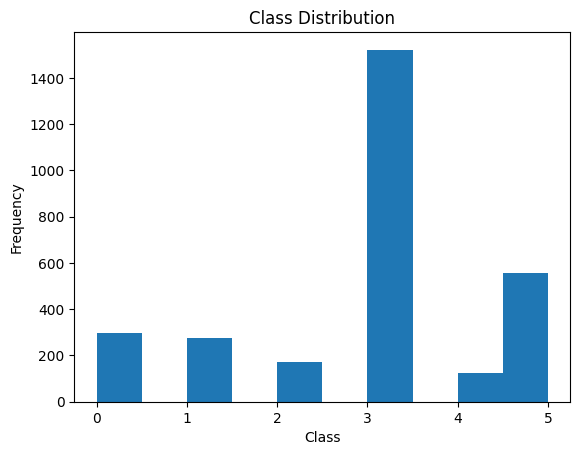

In [ ]:
import matplotlib.pyplot as plt

# Check the class distribution in the training set
plt.hist(y_train, bins=10)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 200}


In [ ]:
best_rf_model = RandomForestClassifier(
    class_weight='balanced',
    max_depth=10,
    n_estimators=200,
    random_state=42
)
best_rf_model.fit(x_train, y_train)
y_pred_best_rf = best_rf_model.predict(x_test)

# Calculate and print evaluation metrics
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy on test set: ", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))
feature_importance = best_rf_model.feature_importances_
sorted_idx = feature_importance.argsort()

Accuracy on test set:  0.9577690403378477
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       660
           1       0.87      1.00      0.93       611
           2       0.86      0.99      0.92       393
           3       1.00      0.93      0.96      3700
           4       0.98      1.00      0.99       251
           5       0.93      0.99      0.96      1252

    accuracy                           0.96      6867
   macro avg       0.93      0.98      0.96      6867
weighted avg       0.96      0.96      0.96      6867



In [ ]:
def predict()